In [1]:
#imports numpy library
#imports pandas library
#imports LabelEncoder class from the sklearn.preprocessing module
#imports matplotlib.pyplot module
#imports nltk package, which provides resources for natural language processing
#imports Seaborn data visualization library
#imports PorterStemmer to avoid the stemming
#imports the stopwords module from the nltk.corpus package.
#imports built-in string module in Python.
#imports the WordCloud class from the wordcloud package
#Imports counter
#imports classes for vectorizing text data into numerical feature vectors
#imports function to split a dataset into training and testing sets
#imports decision tree algorithm for classification tasks
#imports random forest algorithm for classification tasks
#imports GaussianNB, MultinomialNB and BernoulliNB from sklearn.naive_bayes

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
#reading the dataset
df = pd.read_csv('spam_or_not_spam 2.csv', encoding='ISO-8859-1')

In [3]:
#checking the data head
df.sample(7)

,email,label
393,date fri NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
2015,url URL date not supplied sixdegress is a NUMB...,0
351,glm wrote and a java program due to the extens...,0
1507,ben mord said ah in that case you can use som...,0
1505,original message from crispin cowan mailto cr...,0
1890,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0
391,on sat NUMBER aug NUMBER harlan harlan feinst...,0


In [4]:
df.shape

(2608, 2)

In [5]:
# Changing the column names
df.rename(columns={'label':'target'}, inplace=True)

In [6]:
#checking the data head
df.head()

,email,target
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


# Data Cleaning

In [7]:
#finding the missing values
df.isnull().sum()

email     1
target    0
dtype: int64

In [8]:
#dropping the null body
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

email     0
target    0
dtype: int64

In [10]:
df.head()

,email,target
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [11]:
#checking the duplicate values
df.duplicated().sum()

110

In [12]:
#removing the duplicate data
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

# Exploratory Data Analysis(EDA)

In [14]:
#counting the total number of ham and spam value
df['target'].value_counts()

0    2110
1     387
Name: target, dtype: int64

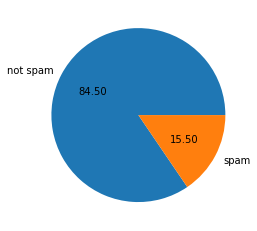

In [15]:
#creating pie chart to visualize the distribution of values in the 'detect' for ham and spam sms data
plt.pie(df['target'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
#show thepie chart
plt.show()

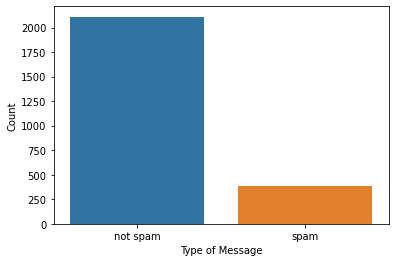

In [16]:
#generating a bar chart of the 'detect' column in the DataFrame 'df' using Seaborn's countplot() function
sns.countplot(data=df, x='target')
plt.xlabel('Type of Message')
plt.ylabel('Count')
plt.xticks([0, 1], ['not spam', 'spam'])
plt.show()

In [17]:
#adding a new column to the DataFrame containing the number of characters in each sms
df['character_number'] = df['email'].apply(len)

In [18]:
df.sample(7)

,email,target,character_number
1435,no please post a link fox original message fro...,0,900
732,let me put it another way f mike says how are...,0,402
558,begin pgp signed message hash shaNUMBER say a...,0,7845
489,oh well uh thank you russell lol i think c on ...,0,1416
1270,justin mason jm jmason org NUMBER NUMBER NUMBE...,0,861
11,yes great minds think alike but even withput e...,0,821
492,intersectedness i d be surprised if beberg eve...,0,670


In [19]:
#adding a new column to the DataFrame containing the number of words in each sms
df['word_number'] = df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.sample(7)

,email,target,character_number,word_number
1280,good day fox on fri NUMBER aug NUMBER fox wrot...,0,1022,176
2535,question do you want a different job do you w...,1,651,120
1646,url URL date wed NUMBER sep NUMBER NUMBER NUMB...,0,388,64
1044,just got this i was just reading mail but in a...,0,1734,283
100,vernon i m changing the instructions in the sp...,0,941,180
1585,here s clarification of why i did first test r...,0,1349,201
1358,on sun NUMBER sep NUMBER the voices made marc ...,0,796,141


In [21]:
#adding a new column to the DataFrame containing the number of sentences in each sms
df['sentence_number'] = df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.sample(7)

,email,target,character_number,word_number,sentence_number
2283,hyperlink mother natures all natural marital ...,1,438,67,1
302,remember i didn t say it was necessarily a goo...,0,1998,360,1
2592,there is no stumbling on to it the greatest wa...,1,2773,422,1
2147,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0,274,52,1
29,update on this for anyone that s interested an...,0,2526,470,1
2048,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0,213,35,1
1122,matthias saou wrote once upon a time roi wrote...,0,897,162,1


In [23]:
#generating descriptive statistics for the 'character_number', 'word_number', and 'sentence_number'
df[['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,2497.000000,2497.000000,2497.000000
mean,1400.213857,231.853825,0.999600
std,4769.386079,458.082097,0.020012
min,1.000000,0.000000,0.000000
25%,392.000000,68.000000,1.000000
50%,771.000000,137.000000,1.000000
75%,1364.000000,237.000000,1.000000
max,200408.000000,11602.000000,1.000000


In [24]:
#generating descriptive statistics of HAM records for the 'character_number', 'word_number', and 'sentence_number'
df[df['target'] == 0][['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,2110.000000,2110.000000,2110.0
mean,1181.910900,207.072986,1.0
std,2035.896045,349.471708,0.0
min,5.000000,1.000000,1.0
25%,361.250000,63.000000,1.0
50%,734.500000,129.000000,1.0
75%,1292.750000,230.000000,1.0
max,35671.000000,6338.000000,1.0


In [25]:
#generating descriptive statistics of HAM records for the 'character_number', 'word_number', and 'sentence_number'
df[df['target'] == 1][['character_number','word_number','sentence_number']].describe()

,character_number,word_number,sentence_number
count,387.000000,387.000000,387.000000
mean,2590.444444,366.963824,0.997416
std,11079.819512,817.276514,0.050833
min,1.000000,0.000000,0.000000
25%,570.500000,95.500000,1.000000
50%,995.000000,166.000000,1.000000
75%,2036.500000,343.000000,1.000000
max,200408.000000,11602.000000,1.000000


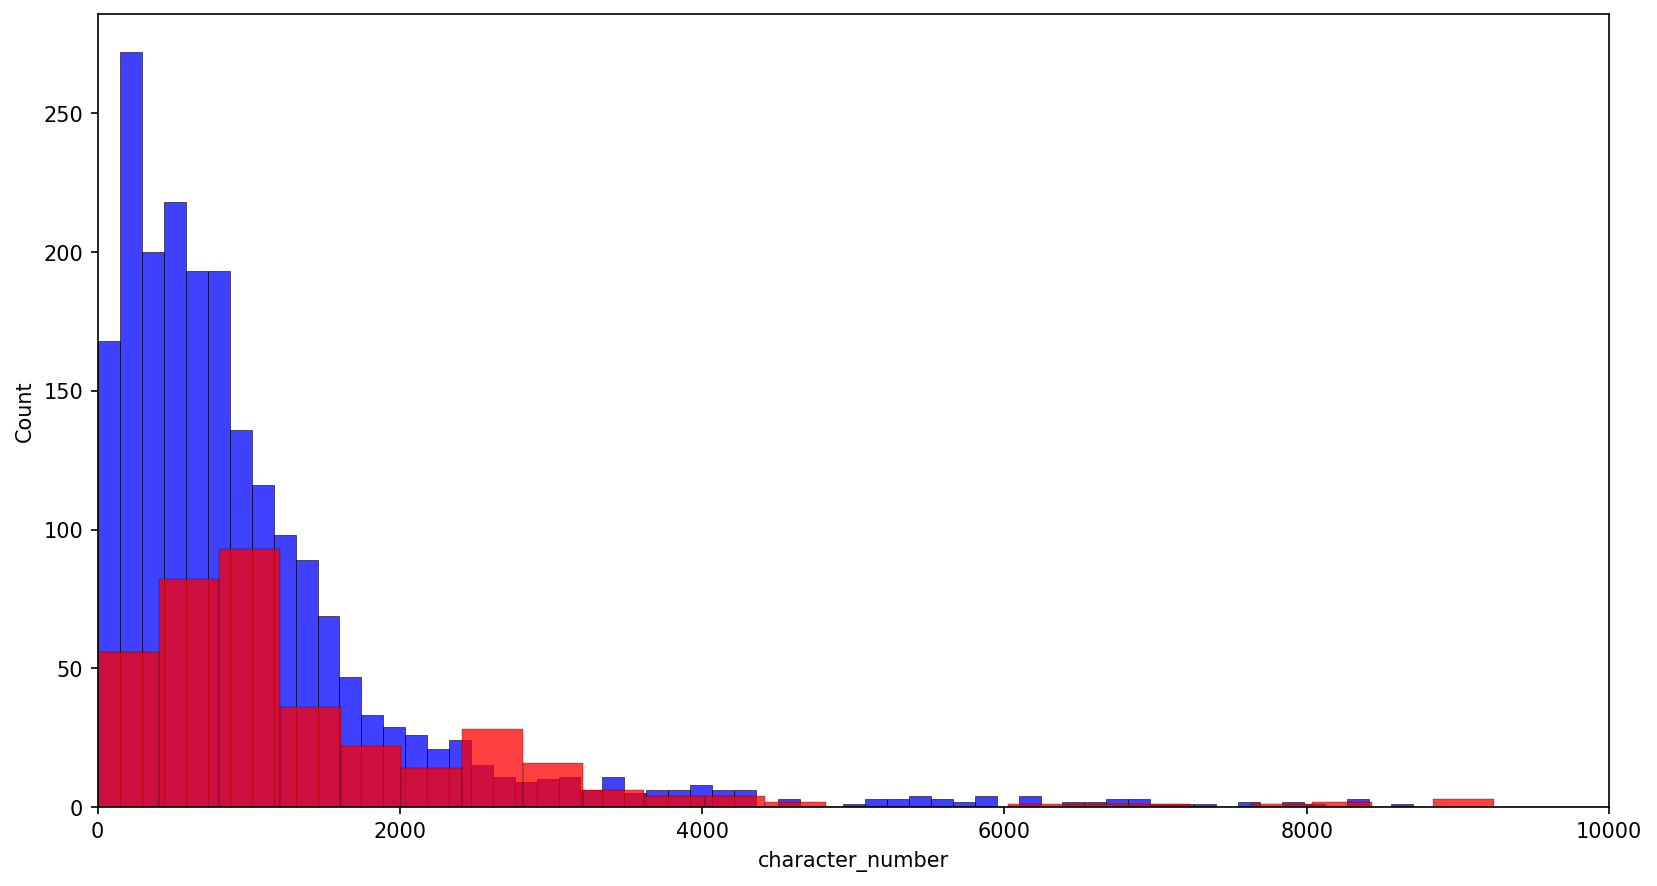

In [26]:
#Creating a figure with a specific size and generate two histograms of character counts for 'ham' and 'spam'
plt.figure(figsize=(13,7), dpi=150)
sns.histplot(df[df['target'] == 0]['character_number'],color='blue')
sns.histplot(df[df['target'] == 1]['character_number'],color='red')
plt.xlim(0, 10000)
plt.show()

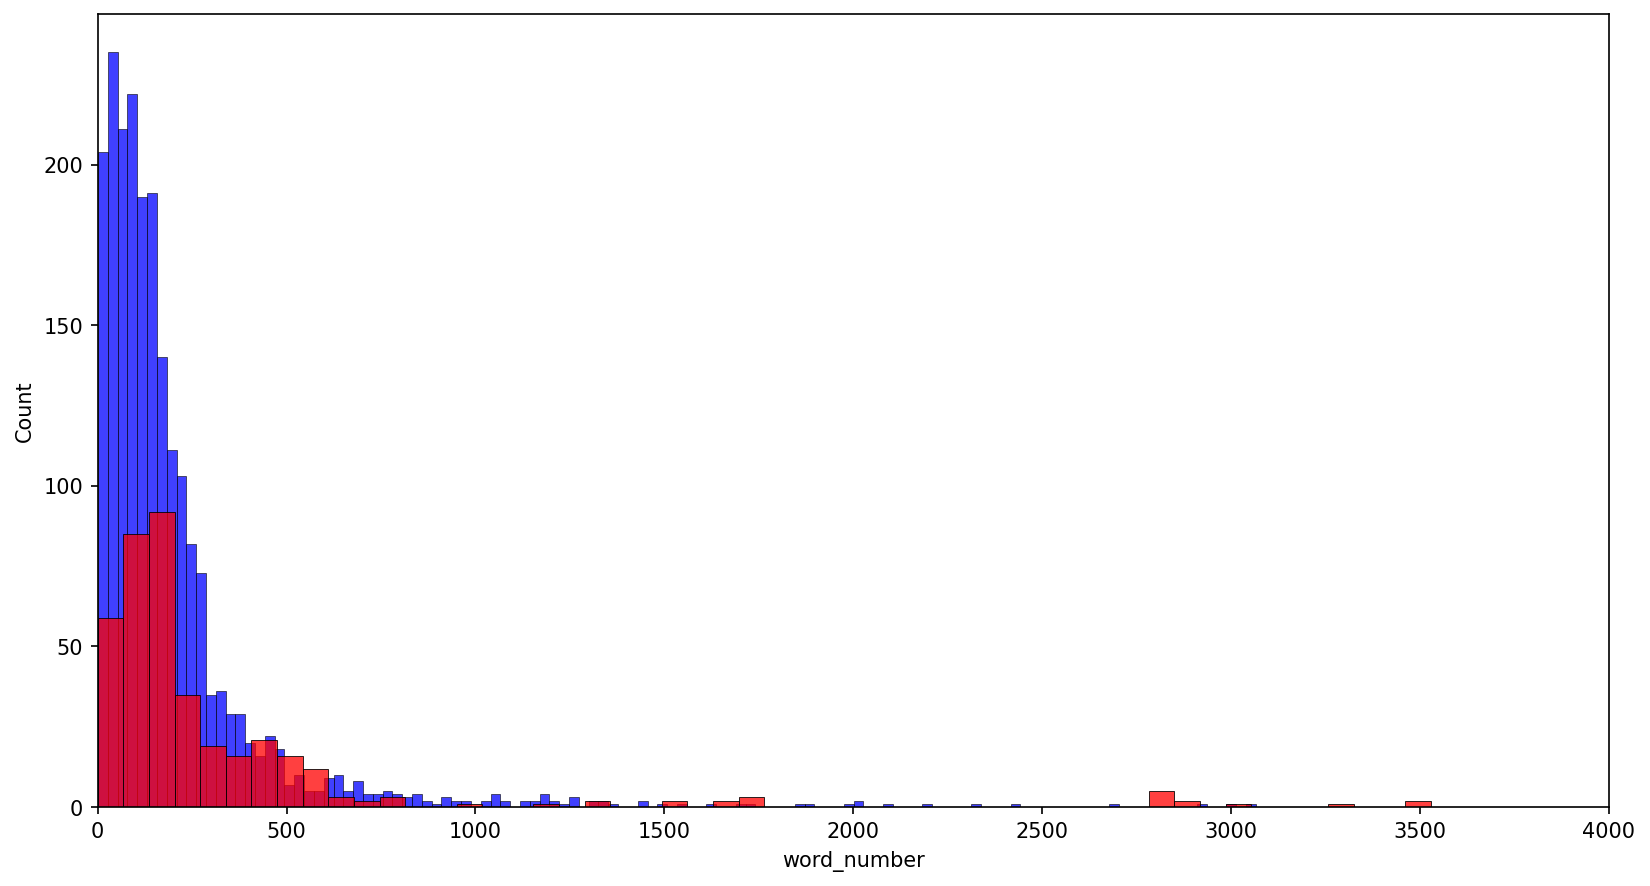

In [27]:
#Creating a figure with a specific size and generate two histograms of character counts for 'ham' and 'spam'
plt.figure(figsize=(13,7), dpi=150)
sns.histplot(df[df['target'] == 0]['word_number'],color='blue')
sns.histplot(df[df['target'] == 1]['word_number'],color='red')
plt.xlim(0, 4000)
plt.show()

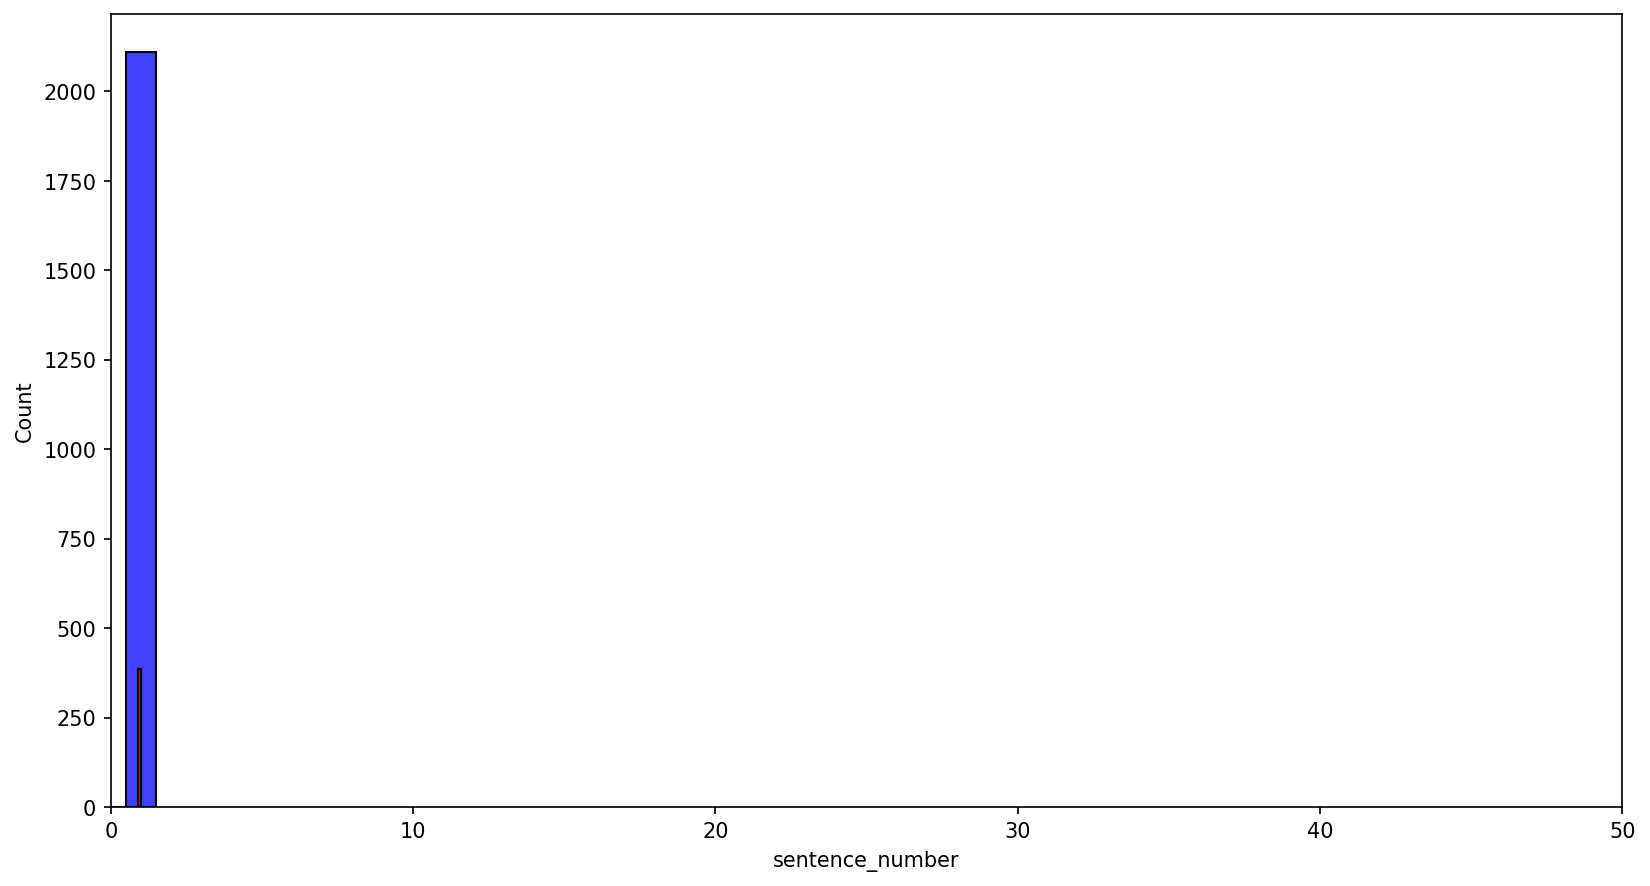

In [28]:
#Creating a figure with a specific size and generate two histograms of character counts for 'ham' and 'spam'
plt.figure(figsize=(13,7), dpi=150)
sns.histplot(df[df['target'] == 0]['sentence_number'],color='blue')
sns.histplot(df[df['target'] == 1]['sentence_number'],color='red')
plt.xlim(0, 50)
plt.show()

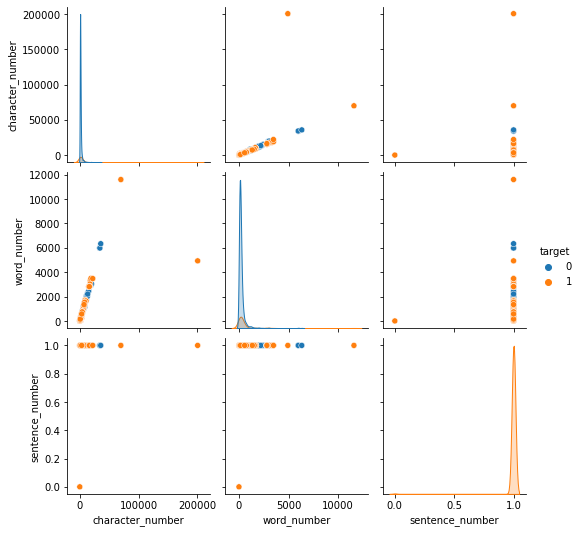

In [29]:
#generating a pair plot using Seaborn's pairplot() function, with 'detect' used to differentiate between 'ham' and 'spam' messages
sns.pairplot(df,hue='target')


<AxesSubplot:>

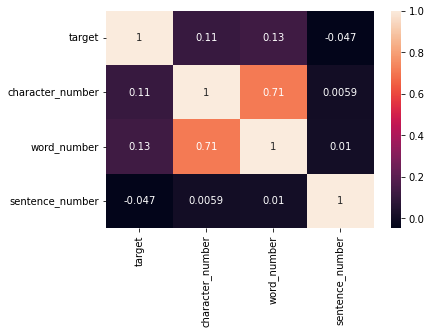

In [30]:
#generating heatmap of the correlation matrix using Seaborn's heatmap() function, with numerical values displayed on the plot
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [31]:
ps = PorterStemmer()
def transform_email(email):
    # Convert the string to lowercase
    email = email.lower()
    # Tokenize the string into words
    email = nltk.word_tokenize(email)
    
    # Remove non-alphanumeric characters
    y = []
    for i in email:
        if i.isalnum():
            y.append(i)
    
    # Remove stopwords and punctuation
    email = y[:]
    y.clear()
    
    for i in email:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    # Apply stemming to reduce words to their base form
    sms = y[:]
    y.clear()
    
    for i in email:
        y.append(ps.stem(i))
    
    # Join the words back into a single string        
    return " ".join(y)

In [32]:
df['transformed_email'] = df['email'].apply(transform_email)

In [33]:
df.sample(7)

,email,target,character_number,word_number,sentence_number,transformed_email
1776,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0,160,27,1,url url date number number numbertnumb number ...
892,on fri sep NUMBER NUMBER at NUMBER NUMBER robe...,0,1410,265,1,on fri sep number number at number number robe...
957,hi i m building an rpm for the resin webserver...,0,614,105,1,hi i m build an rpm for the resin webserv and ...
2272,to be removed please click hyperlink here or s...,1,991,186,1,to be remov pleas click hyperlink here or simp...
2060,url URL date not supplied disney s themepark b...,0,822,136,1,url url date not suppli disney s themepark bus...
1755,url URL date NUMBER NUMBER NUMBERtNUMBER NUMBE...,0,84,12,1,url url date number number numbertnumb number ...
751,people with too much time on their hands look ...,0,234,40,1,peopl with too much time on their hand look at...


In [34]:
#A WordCloud object is created with a width of 600 pixels, height of 600 pixels, a minimum font size of 12 pixels, and a white background color
wc = WordCloud(width=600,height=600,min_font_size=12,background_color='white')
#The generate method of the WordCloud object is called with the transformed SMS messages that are classified as spam.
spam_wc = wc.generate(df[df['target'] == 1]['transformed_email'].str.cat(sep=" "))

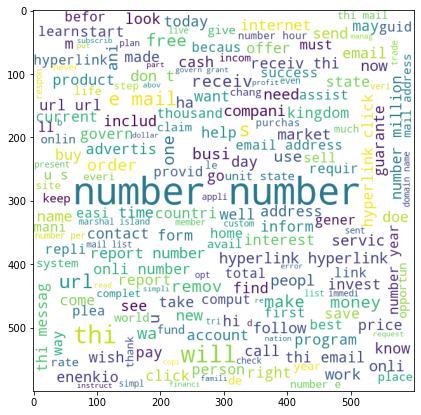

In [35]:
#A figure object with a width of 16 inches and height of 7 inches is created using the figure method of the pyplot module
plt.figure(figsize=(16,7))
#The resulting image is shown in the output by passinf the spam_wc variable
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_email'].str.cat(sep=" "))

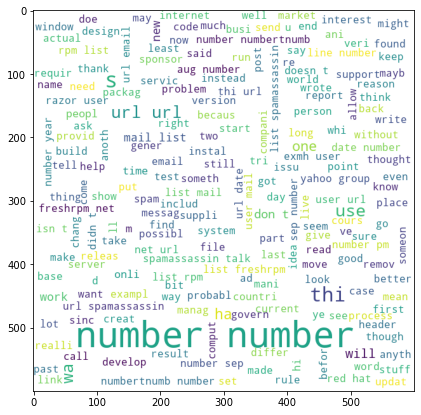

In [37]:
plt.figure(figsize=(16,7))
plt.imshow(ham_wc)

In [38]:
#creates an empty list
spam_corpus = []
#initiates a for loop that iterates through each transformed text message where target is a spam
for msg in df[df['target'] == 1]['transformed_email'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
#Total number of detected spam words
len(spam_corpus)

140785

/Users/debmalyadeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


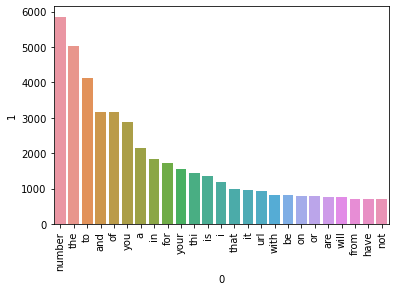

In [40]:
#creates a barplot using Seaborn library with most common 25 spam words
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(25))[0],pd.DataFrame(Counter(spam_corpus).most_common(25))[1])
#rotates the x-axis tick labels vertically
plt.xticks(rotation='vertical')
#shows the plot
plt.show()

In [41]:
#creates an empty list
ham_corpus = []
#initiates a for loop that iterates through each transformed text message where target is a ham
for msg in df[df['target'] == 0]['transformed_email'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
#Total number of detected ham words
len(ham_corpus)

434445

/Users/debmalyadeb/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


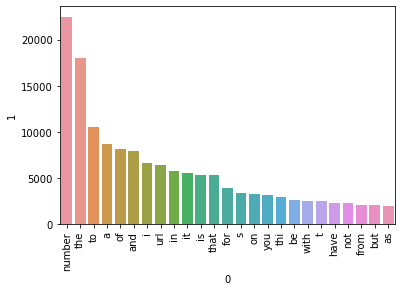

In [43]:
#creates a barplot using Seaborn library with most common 25 ham words
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(25))[0],pd.DataFrame(Counter(ham_corpus).most_common(25))[1])
#rotates the x-axis tick labels vertically
plt.xticks(rotation='vertical')
#shows the plot
plt.show()

# Model Building

Using CountVectorizer

In [44]:
# create a CountVectorizer object
cv = CountVectorizer()

In [45]:
#uses the fit_transform() method of the CountVectorizer object (cv) to convert the text data in the transformed_email column of the DataFrame df into a matrix of token counts
X = cv.fit_transform(df['transformed_email']).toarray()

In [46]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

In [47]:
X.shape

(2497, 22495)

In [48]:
#extracts the target variable from the DataFrame df and creates a NumPy array y containing the values of the target variable.
y = df['target'].values

In [49]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [50]:
#uses the train_test_split function from scikit-learn to split the data into training and testing sets for use in a machine learning model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
#create three different Naive Bayes classifiers, each with a different assumption about the distribution of the input features
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
#fit the Gaussian Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
gnb.fit(X_train,y_train)
#The predictions are stored in the y_pred1 variable.
y_pred1 = gnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("GaussianNB Accuracy is ",accuracy_score(y_test,y_pred1))
print("GaussianNB Precision is ",precision_score(y_test,y_pred1))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred1))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred1))

GaussianNB Accuracy is  0.9573333333333334
GaussianNB Precision is  0.925531914893617
MultinomialNB F1 Score is  0.8446601941747574
MultinomialNB Recall Score is  0.7767857142857143


In [53]:
#fit the Multinomial Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
mnb.fit(X_train,y_train)
#The predictions are stored in the y_pred2 variable.
y_pred2 = mnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("MultinomialNB Accuracy Score is ",accuracy_score(y_test,y_pred2))
print("MultinomialNB Precision Score is ",precision_score(y_test,y_pred2))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred2))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred2))

MultinomialNB Accuracy Score is  0.992
MultinomialNB Precision Score is  0.9818181818181818
MultinomialNB F1 Score is  0.972972972972973
MultinomialNB Recall Score is  0.9642857142857143


In [54]:
#fit the Bernoulli Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
bnb.fit(X_train,y_train)
#The predictions are stored in the y_pred3 variable.
y_pred3 = bnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("BernoulliNB Accuracy is ",accuracy_score(y_test,y_pred3))
print("BernoulliNB Precision is ",precision_score(y_test,y_pred3))
print("BernoulliNB F1 Score is ",f1_score(y_test,y_pred3))
print("BernoulliNB Recall Score is ",recall_score(y_test,y_pred3))

BernoulliNB Accuracy is  0.9013333333333333
BernoulliNB Precision is  0.7159090909090909
BernoulliNB F1 Score is  0.63
BernoulliNB Recall Score is  0.5625


# Using TfidfVectorizer

In [181]:
#creates a TfidfVectorizer object, which is used to transform the text data into a numerical representation that can be used in machine learning algorithms
tfidf = TfidfVectorizer()

Using TfidfVectorizer where max_features=3000

In [128]:
#TfidfVectorizer object will include only the 3000 most frequently occurring words in the corpus,
tfidf = TfidfVectorizer(max_features=3000)

In [182]:
#transform the preprocessed text data (df['transformed_sms']) into a numerical feature matrix (X)
X = tfidf.fit_transform(df['transformed_email']).toarray()

In [183]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06494412, 0.06494412,
        0.06494412]])

In [184]:
#Shape of the X variable
X.shape

(2497, 22495)

In [185]:
#creates a NumPy array y containing the values of the 'target' column from the DataFrame df
y = df['target'].values

In [186]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [187]:
#splitting a dataset into training and testing sets. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [188]:
X_train.shape

(1747, 22495)

In [189]:
X_test.shape

(750, 22495)

In [137]:
#fit the Gaussian Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
gnb.fit(X_train,y_train)
#The predictions are stored in the y_pred1 variable.
y_pred1 = gnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("GaussianNB Accuracy is ",accuracy_score(y_test,y_pred1))
print("GaussianNB Precision is ",precision_score(y_test,y_pred1))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred1))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred1))

GaussianNB Accuracy is  0.956
GaussianNB Precision is  0.9157894736842105
MultinomialNB F1 Score is  0.8405797101449276
MultinomialNB Recall Score is  0.7767857142857143


In [138]:
#fit the Multinomial Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
mnb.fit(X_train,y_train)
#The predictions are stored in the y_pred2 variable.
y_pred2 = mnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("MultinomialNB Accuracy Score is ",accuracy_score(y_test,y_pred2))
print("MultinomialNB Precision Score is ",precision_score(y_test,y_pred2))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred2))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred2))


MultinomialNB Accuracy Score is  0.9653333333333334
MultinomialNB Precision Score is  1.0
MultinomialNB F1 Score is  0.8686868686868687
MultinomialNB Recall Score is  0.7678571428571429


In [139]:
#fit the Bernoulli Naive Bayes classifier on the training data X_train and y_train, and use it to make predictions on the testing data X_test. The predictions are stored in the y_pred1 variable.
bnb.fit(X_train,y_train)
#The predictions are stored in the y_pred3 variable.
y_pred3 = bnb.predict(X_test)
#accuracy_score() and precision_score() functions from scikit-learn are then used to evaluate the performance
print("BernoulliNB Accuracy is ",accuracy_score(y_test,y_pred3))
print("BernoulliNB Precision is ",precision_score(y_test,y_pred3))
print("MultinomialNB F1 Score is ",f1_score(y_test,y_pred3))
print("MultinomialNB Recall Score is ",recall_score(y_test,y_pred3))

BernoulliNB Accuracy is  0.928
BernoulliNB Precision is  0.7416666666666667
MultinomialNB F1 Score is  0.7672413793103449
MultinomialNB Recall Score is  0.7946428571428571


# DecisionTreeClassifier, RandomForestClassifier And Naive Bayes comparison

In [140]:
#Creates an instance of the DecisionTreeClassifier class with a maximum depth of 5
dtc = DecisionTreeClassifier(max_depth=5)
#Creates an instance of the RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

In [141]:
#creates a dictionary clfs that maps the names of different classifiers to the actual classifier objects
clfs = {
    'DecisionTreeClassifier': dtc,
    'RandomForestClassifier': rfc,
    'Naive_Bayes':mnb
}

In [142]:
#defines a function called train_classifier that takes in five arguments
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,f1,recall

In [143]:
#calling the train_classifier function with the dtc arugument
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.9493333333333334,
 0.8627450980392157,
 0.8224299065420562,
 0.7857142857142857)

In [144]:
#calling the train_classifier function with the rfc arugument
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9786666666666667,
 0.9897959183673469,
 0.9238095238095239,
 0.8660714285714286)

In [145]:
#creates three empty lists to store the accuracy and precision scores for each classifier
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
#iterates over the items in the clfs dictionary, which contains the names of the classifiers as keys and the classifier objects as values
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1)
    print("Recall Score - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    

For  DecisionTreeClassifier
Accuracy -  0.9493333333333334
Precision -  0.8627450980392157
F1 Score -  0.8224299065420562
Recall Score -  0.7857142857142857
For  RandomForestClassifier
Accuracy -  0.9786666666666667
Precision -  0.9897959183673469
F1 Score -  0.9238095238095239
Recall Score -  0.8660714285714286
For  Naive_Bayes
Accuracy -  0.9653333333333334
Precision -  1.0
F1 Score -  0.8686868686868687
Recall Score -  0.7678571428571429


In [123]:
#creates a pandas DataFrame object

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1':f1_scores, 'Recall':recall_scores}).sort_values('Precision',ascending=False)



In [124]:
performance_df

,Algorithm,Accuracy,Precision,F1,Recall
2,Naive_Bayes,0.869333,1.000000,0.222222,0.125000
1,RandomForestClassifier,0.974667,0.989474,0.908213,0.839286
0,DecisionTreeClassifier,0.950667,0.871287,0.826291,0.785714


In [125]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [126]:
performance_df1

,Algorithm,variable,value
0,Naive_Bayes,Accuracy,0.869333
1,RandomForestClassifier,Accuracy,0.974667
2,DecisionTreeClassifier,Accuracy,0.950667
3,Naive_Bayes,Precision,1.000000
4,RandomForestClassifier,Precision,0.989474
5,DecisionTreeClassifier,Precision,0.871287
6,Naive_Bayes,F1,0.222222
7,RandomForestClassifier,F1,0.908213
8,DecisionTreeClassifier,F1,0.826291
9,Naive_Bayes,Recall,0.125000


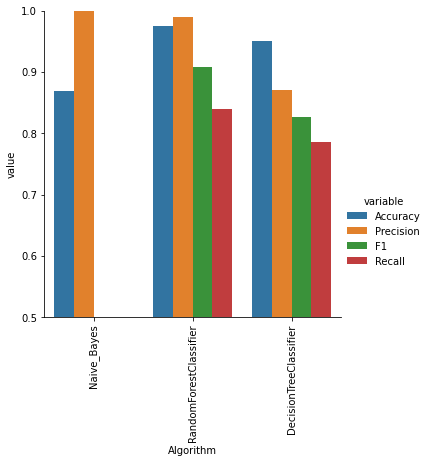

In [127]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Set the max_features parameter to 3000 of TfIdf

In [146]:
#creates a new DataFrame temp_df with four columns: 'Algorithm', 'Accuracy_max_ft_3000', 'Precision_max_ft_3000', and 'F1_max_ft_3000'
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'F1_max_ft_3000':f1_scores, 'Recall_max_ft_3000':recall_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [147]:
#merges the two DataFrames performance_df and temp_df on the 'Algorithm' column and creates a new DataFrame new_df.
new_df = performance_df.merge(temp_df,on='Algorithm')

In [148]:
new_df

,Algorithm,Accuracy,Precision,F1,Recall,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,Naive_Bayes,0.869333,1.000000,0.222222,0.125000,0.965333,1.000000,0.868687,0.767857
1,RandomForestClassifier,0.974667,0.989474,0.908213,0.839286,0.978667,0.989796,0.923810,0.866071
2,DecisionTreeClassifier,0.950667,0.871287,0.826291,0.785714,0.949333,0.862745,0.822430,0.785714


In [149]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
performance_df2 = pd.melt(new_df, id_vars = "Algorithm")


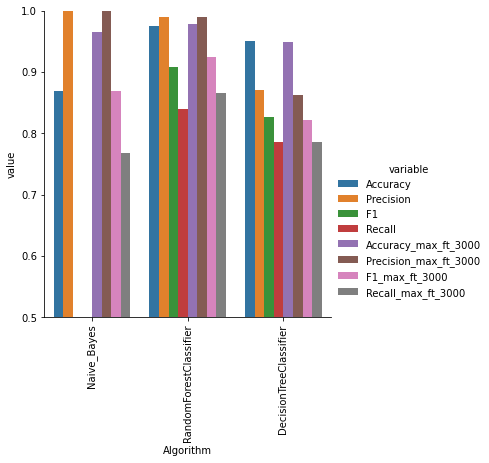

In [150]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df2, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# DecisionTreeClassifier, RandomForestClassifier using Xgboost

In [151]:
import xgboost as xgb

# Initializes an instance of the XGBClassifier class with a maximum depth of 5
xgb_dtc = xgb.XGBClassifier(max_depth=5)

# Initializes an instance of the XGBClassifier class with 50 estimators and random state 42
xgb_rf = xgb.XGBRFClassifier(n_estimators=50, random_state=42)


In [152]:
#creates a dictionary clfs that maps the names of different classifiers to the actual classifier objects
clfs1 = {
    'xgboost_DecisionTreeClassifier': xgb_dtc,
    'xgboost_RandomForestClassifier': xgb_rf,
}

# Using TfidfVectorizer

In [153]:
#creates a TfidfVectorizer object, which is used to transform the text data into a numerical representation that can be used in machine learning algorithms
tfidf = TfidfVectorizer()


# Using TfidfVectorizer where max_features=3000

In [166]:
#TfidfVectorizer object will include only the 3000 most frequently occurring words in the corpus,
tfidf = TfidfVectorizer(max_features=3000)

In [167]:
#transform the preprocessed text data (df['transformed_email']) into a numerical feature matrix (X)
X = tfidf.fit_transform(df['transformed_email']).toarray()

In [168]:
#creates a NumPy array y containing the values of the 'target' column from the DataFrame df
y = df['target'].values

In [169]:
#splitting a dataset into training and testing sets. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [170]:
#defines a function called train_classifier that takes in five arguments
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,f1,recall

In [171]:
#calling the train_classifier function with the xgb_dtc arugument
train_classifier(xgb_dtc,X_train,y_train,X_test,y_test)

(0.98, 0.944954128440367, 0.9321266968325792, 0.9196428571428571)

In [172]:
#calling the train_classifier function with the xgb_rf arugument
train_classifier(xgb_rf,X_train,y_train,X_test,y_test)

(0.9586666666666667,
 0.9090909090909091,
 0.8530805687203793,
 0.8035714285714286)

In [173]:
#creates three empty lists to store the accuracy and precision scores for each classifier
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
#iterates over the items in the clfs1 dictionary, which contains the names of the classifiers as keys and the classifier objects as values
for name,clf in clfs1.items():
    
    current_accuracy,current_precision,current_f1,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 Score - ",current_f1)
    print("Recall Score - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)
    

For  xgboost_DecisionTreeClassifier
Accuracy -  0.98
Precision -  0.944954128440367
F1 Score -  0.9321266968325792
Recall Score -  0.9196428571428571
For  xgboost_RandomForestClassifier
Accuracy -  0.9586666666666667
Precision -  0.9090909090909091
F1 Score -  0.8530805687203793
Recall Score -  0.8035714285714286


In [161]:
#creates a pandas DataFrame object

xgb_performance_df = pd.DataFrame({'Algorithm':clfs1.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1':f1_scores, 'Recall' :recall_scores}).sort_values('Precision',ascending=False)



In [162]:
xgb_performance_df

,Algorithm,Accuracy,Precision,F1,Recall
0,xgboost_DecisionTreeClassifier,0.981333,0.945455,0.936937,0.928571
1,xgboost_RandomForestClassifier,0.960000,0.910000,0.858491,0.812500


In [163]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
xgb_performance_df1 = pd.melt(xgb_performance_df, id_vars = "Algorithm")


In [164]:
xgb_performance_df1

,Algorithm,variable,value
0,xgboost_DecisionTreeClassifier,Accuracy,0.981333
1,xgboost_RandomForestClassifier,Accuracy,0.960000
2,xgboost_DecisionTreeClassifier,Precision,0.945455
3,xgboost_RandomForestClassifier,Precision,0.910000
4,xgboost_DecisionTreeClassifier,F1,0.936937
5,xgboost_RandomForestClassifier,F1,0.858491
6,xgboost_DecisionTreeClassifier,Recall,0.928571
7,xgboost_RandomForestClassifier,Recall,0.812500


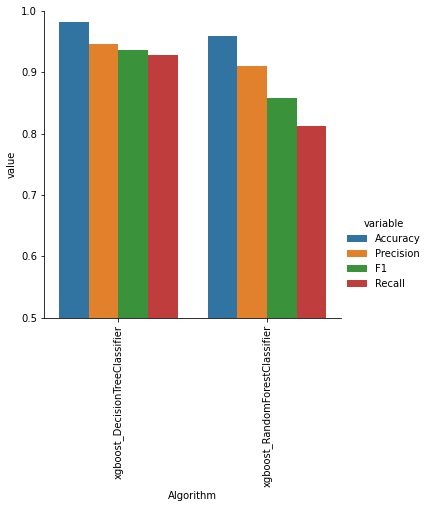

In [165]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=xgb_performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Set the max_features parameter to 3000 of TfIdf

In [174]:
#creates a new DataFrame temp_df with four columns: 'Algorithm', 'Accuracy_max_ft_3000', 'Precision_max_ft_3000', and 'F1_max_ft_3000'
xgb_temp_df = pd.DataFrame({'Algorithm':clfs1.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'F1_max_ft_3000':f1_scores, 'Recall_max_ft_3000':recall_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [175]:
xgb_temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,xgboost_DecisionTreeClassifier,0.980000,0.944954,0.932127,0.919643
1,xgboost_RandomForestClassifier,0.958667,0.909091,0.853081,0.803571


In [176]:
#function is used to transform the DataFrame performance_df from "wide" to "long" format. Specifically, it "unpivots" the DataFrame by melting the columns
xgb_temp_df1 = pd.melt(xgb_temp_df, id_vars = "Algorithm")


In [177]:
xgb_temp_df1

,Algorithm,variable,value
0,xgboost_DecisionTreeClassifier,Accuracy_max_ft_3000,0.980000
1,xgboost_RandomForestClassifier,Accuracy_max_ft_3000,0.958667
2,xgboost_DecisionTreeClassifier,Precision_max_ft_3000,0.944954
3,xgboost_RandomForestClassifier,Precision_max_ft_3000,0.909091
4,xgboost_DecisionTreeClassifier,F1_max_ft_3000,0.932127
5,xgboost_RandomForestClassifier,F1_max_ft_3000,0.853081
6,xgboost_DecisionTreeClassifier,Recall_max_ft_3000,0.919643
7,xgboost_RandomForestClassifier,Recall_max_ft_3000,0.803571


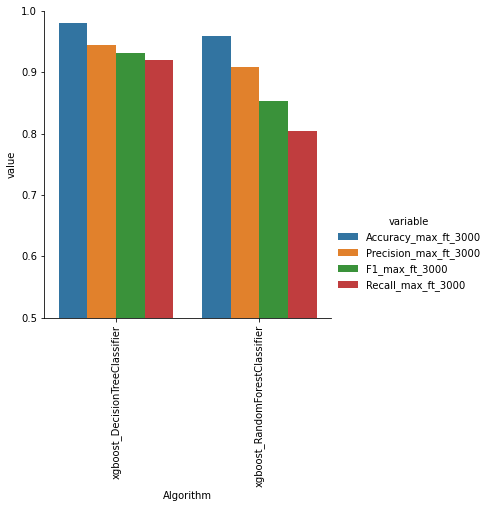

In [178]:
#generates a bar plot using Seaborn's catplot() function to visualize the accuracy, precision and f1 scores of the classifiers stored in the DataFrame 
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=xgb_temp_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [179]:
#merges the two DataFrames performance_df and temp_df on the 'Algorithm' column and creates a new DataFrame new_df.
xgb_new_df = xgb_performance_df.merge(xgb_temp_df,on='Algorithm')

In [180]:
xgb_new_df

,Algorithm,Accuracy,Precision,F1,Recall,Accuracy_max_ft_3000,Precision_max_ft_3000,F1_max_ft_3000,Recall_max_ft_3000
0,xgboost_DecisionTreeClassifier,0.981333,0.945455,0.936937,0.928571,0.980000,0.944954,0.932127,0.919643
1,xgboost_RandomForestClassifier,0.960000,0.910000,0.858491,0.812500,0.958667,0.909091,0.853081,0.803571
